In [20]:
from utils.constants import WINDOW_SIZE, Events
from utils import load_data, calc_metrics, plot_metrics, read_metrics_file

date = "2023-04-23"
station = "pwnk"
event: Events = "Forbush Decrease"

## Create Sliding Windows and calc metrics for each one

Sliding windows pandas documentation: [Here](https://pandas.pydata.org/docs/user_guide/window.html).  
Pandas `rolling` documentation: [Here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html#pandas.DataFrame.rolling).

Interesting metric to see: [Burstiness Parameter](https://arxiv.org/pdf/1604.01125)

In [21]:
df = load_data(f"./data/{event.replace(' ', '')}/{date}/all.txt")
df.index = df["datetime"]
df.drop(columns="datetime", inplace=True)
df

,ATHN,MXCO,NANM,CALM,ROME,AATB,BKSN,JUNG,JUNG1,LMKS,...,JBGO,NAIN,PWNK,THUL,MWSN,SOPB,SOPO,DOMB,DOMC,TERA
datetime,,,,,,,,,,,,,,,,,,,,,
2023-04-23 00:00:00,56.182,217.383,253.382,NaN,118.000,1301.6,130.170,150.136,349.538,415.346,...,NaN,198.49,213.80,116.42,215.482,135.37,276.92,4.660,17.456,109.176
2023-04-23 00:01:00,52.846,221.100,258.798,NaN,123.967,1282.8,127.505,154.071,349.006,418.165,...,256.21,203.56,204.96,119.65,223.857,134.08,275.25,4.790,17.739,112.275
2023-04-23 00:02:00,53.306,219.650,263.611,NaN,119.617,1294.4,124.252,153.263,348.047,424.944,...,257.14,198.66,209.83,115.51,221.355,136.69,277.01,4.493,18.394,111.132
2023-04-23 00:03:00,52.912,223.200,258.781,NaN,119.417,1317.4,122.385,156.517,353.549,423.495,...,NaN,200.03,206.39,118.91,212.872,136.84,284.17,5.273,16.882,108.487
2023-04-23 00:04:00,54.893,218.417,254.123,NaN,119.533,1298.5,126.092,155.687,341.097,420.367,...,NaN,202.88,198.21,120.45,220.680,135.59,279.40,4.976,17.678,110.898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24 23:55:00,52.741,218.400,255.364,72.033,118.850,1281.3,125.709,153.080,346.768,421.473,...,NaN,194.73,205.69,112.67,213.265,130.70,269.62,4.557,16.254,110.312
2023-04-24 23:56:00,49.457,219.250,259.947,69.067,120.317,1272.8,124.285,153.852,354.916,415.708,...,249.79,194.40,198.99,114.05,213.048,131.37,270.49,4.468,18.175,110.203
2023-04-24 23:57:00,53.623,218.100,259.404,73.200,119.083,1256.3,125.522,149.907,340.224,415.544,...,249.31,197.86,200.50,111.94,219.132,132.31,270.29,4.671,18.176,105.603


In [22]:
# Taking just one station for simplicity
station_df = df[[station.upper()]]
station_df

,PWNK
datetime,
2023-04-23 00:00:00,213.80
2023-04-23 00:01:00,204.96
2023-04-23 00:02:00,209.83
2023-04-23 00:03:00,206.39
2023-04-23 00:04:00,198.21
...,...
2023-04-24 23:55:00,205.69
2023-04-24 23:56:00,198.99
2023-04-24 23:57:00,200.50


In [23]:
result = calc_metrics(station_df, station=station, date=date)
result

,value_i,window_shape,entropy,sampen,permutation_entropy,shannon_entropy,spectral_entropy,app_entropy,hurst,dfa,mfhurst_b,higuchi_fd,katz_fd,petrosian_fd,lepel_ziv,lyap_r,corr_dim
datetime_i,,,,,,,,,,,,,,,,,
2023-04-23 00:00:00,213.80,65,4.174213,1.609438,2.549178,1.847326,0.848136,0.502401,0.308280,0.976448,-0.013854,2.094969,3.262373,1.054331,38,0.020681,0.954696
2023-04-23 00:01:00,204.96,66,4.189481,1.634131,2.547872,1.840227,0.839694,0.508324,0.407429,0.975095,-0.004806,2.091510,3.243829,1.053344,38,0.028408,0.968976
2023-04-23 00:02:00,209.83,67,4.204518,1.681759,2.545100,1.852988,0.848842,0.539768,0.407429,0.992722,-0.001111,2.084366,3.235215,1.052390,39,0.032935,0.968424
2023-04-23 00:03:00,206.39,68,4.219335,1.704748,2.551186,1.847377,0.839438,0.513908,0.407429,0.994662,-0.010780,2.082809,3.270726,1.052719,39,0.029728,0.969529
2023-04-23 00:04:00,198.21,69,4.233931,1.727221,2.547448,1.857175,0.856338,0.523966,0.407429,0.987500,-0.014051,2.083834,3.312219,1.053033,40,0.010196,0.964986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24 23:55:00,205.69,70,4.248368,1.845827,2.526892,1.955081,0.830072,0.480882,0.329036,0.940298,-0.014478,2.111350,4.638549,1.056931,37,0.008739,0.895767
2023-04-24 23:56:00,198.99,69,4.233978,1.819158,2.529946,1.959664,0.824449,0.467540,0.366339,0.898898,-0.011797,2.109874,4.020841,1.056700,36,0.008148,0.889095
2023-04-24 23:57:00,200.50,68,4.219381,1.791759,2.536441,1.951373,0.818973,0.453798,0.543149,0.869401,-0.014308,2.109736,4.754218,1.057698,36,0.009716,0.903723


## Plot everything

In [24]:
results = read_metrics_file(
    event=event.replace(" ", ""), date=date, station=station, window_size=WINDOW_SIZE
)
results

,datetime_i,value_i,window_shape,entropy,sampen,permutation_entropy,shannon_entropy,spectral_entropy,app_entropy,hurst,dfa,mfhurst_b,higuchi_fd,katz_fd,petrosian_fd,lepel_ziv,lyap_r,corr_dim
0,2023-04-23 00:00:00,213.80,65,4.174213,1.609438,2.549178,1.847326,0.848136,0.502401,0.308280,0.976448,-0.013854,2.094969,3.262373,1.054331,38,0.020681,0.954696
1,2023-04-23 00:01:00,204.96,66,4.189481,1.634131,2.547872,1.840227,0.839694,0.508324,0.407429,0.975095,-0.004806,2.091510,3.243829,1.053344,38,0.028408,0.968976
2,2023-04-23 00:02:00,209.83,67,4.204518,1.681759,2.545100,1.852988,0.848842,0.539768,0.407429,0.992722,-0.001111,2.084366,3.235215,1.052390,39,0.032935,0.968424
3,2023-04-23 00:03:00,206.39,68,4.219335,1.704748,2.551186,1.847377,0.839438,0.513908,0.407429,0.994662,-0.010780,2.082809,3.270726,1.052719,39,0.029728,0.969529
4,2023-04-23 00:04:00,198.21,69,4.233931,1.727221,2.547448,1.857175,0.856338,0.523966,0.407429,0.987500,-0.014051,2.083834,3.312219,1.053033,40,0.010196,0.964986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2023-04-24 23:55:00,205.69,70,4.248368,1.845827,2.526892,1.955081,0.830072,0.480882,0.329036,0.940298,-0.014478,2.111350,4.638549,1.056931,37,0.008739,0.895767
2876,2023-04-24 23:56:00,198.99,69,4.233978,1.819158,2.529946,1.959664,0.824449,0.467540,0.366339,0.898898,-0.011797,2.109874,4.020841,1.056700,36,0.008148,0.889095
2877,2023-04-24 23:57:00,200.50,68,4.219381,1.791759,2.536441,1.951373,0.818973,0.453798,0.543149,0.869401,-0.014308,2.109736,4.754218,1.057698,36,0.009716,0.903723
2878,2023-04-24 23:58:00,200.93,67,4.204566,1.734601,2.541990,1.952720,0.821347,0.434474,0.342118,0.836407,-0.022054,2.104666,5.124431,1.058730,36,0.012172,0.888717


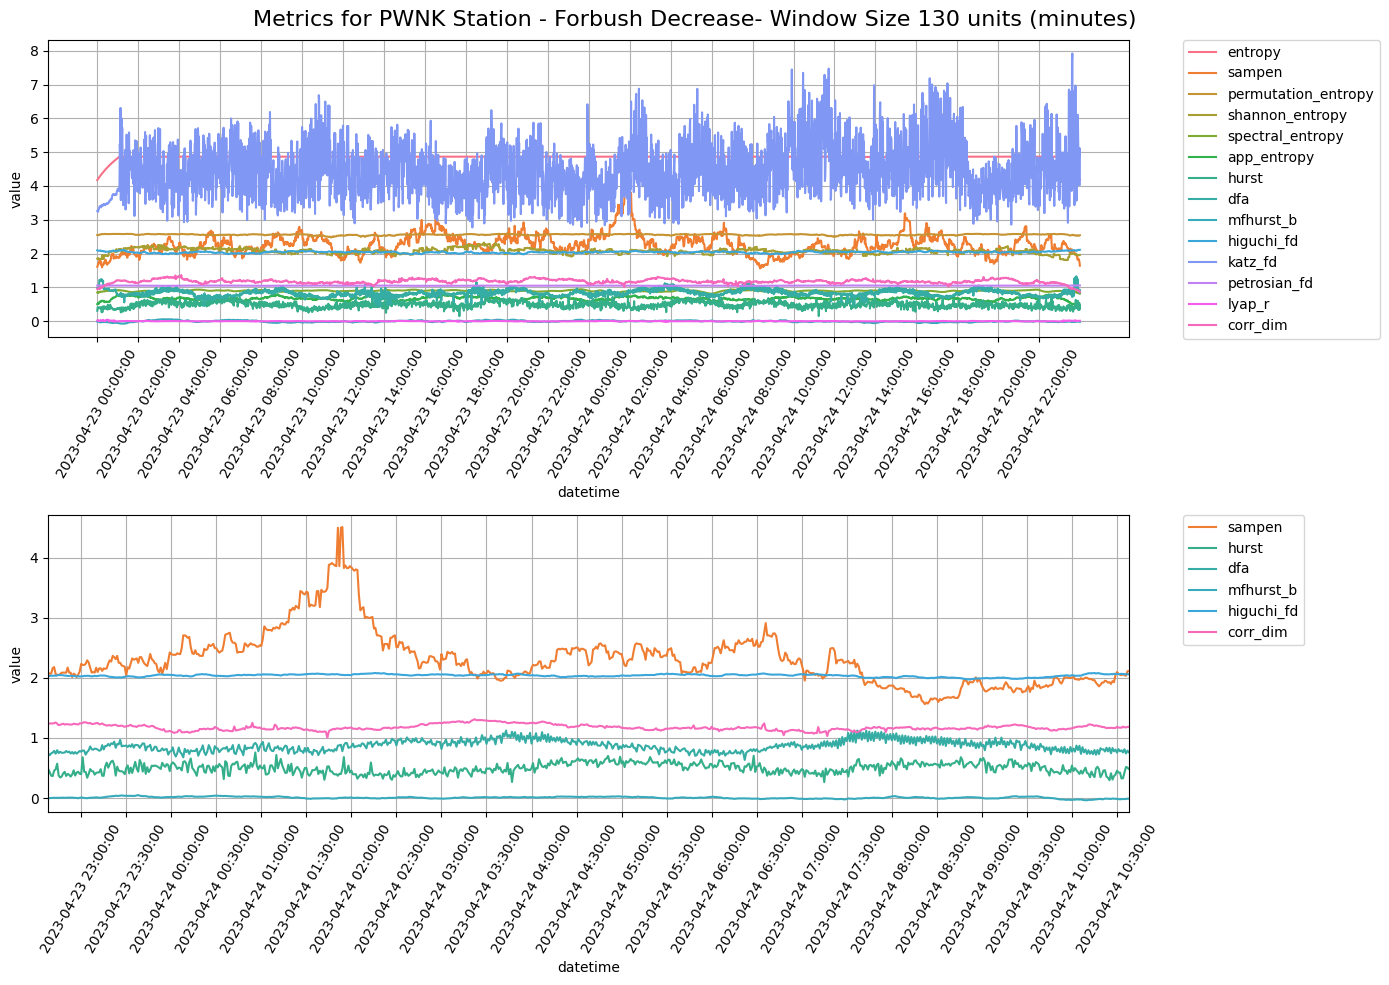

In [30]:
plot_metrics(
    event="Forbush Decrease",
    date=date,
    station=station,
    df=results.drop(columns=["lepel_ziv"]),
    window_size=WINDOW_SIZE,
    relevant_metrics=["sampen", "dfa", "hurst", "higuchi_fd", "mfhurst_b", "corr_dim"],
    min_datetime="2023-04-23 22:38:00",
    max_datetime="2023-04-24 10:38:00",
    suffix="1"
)


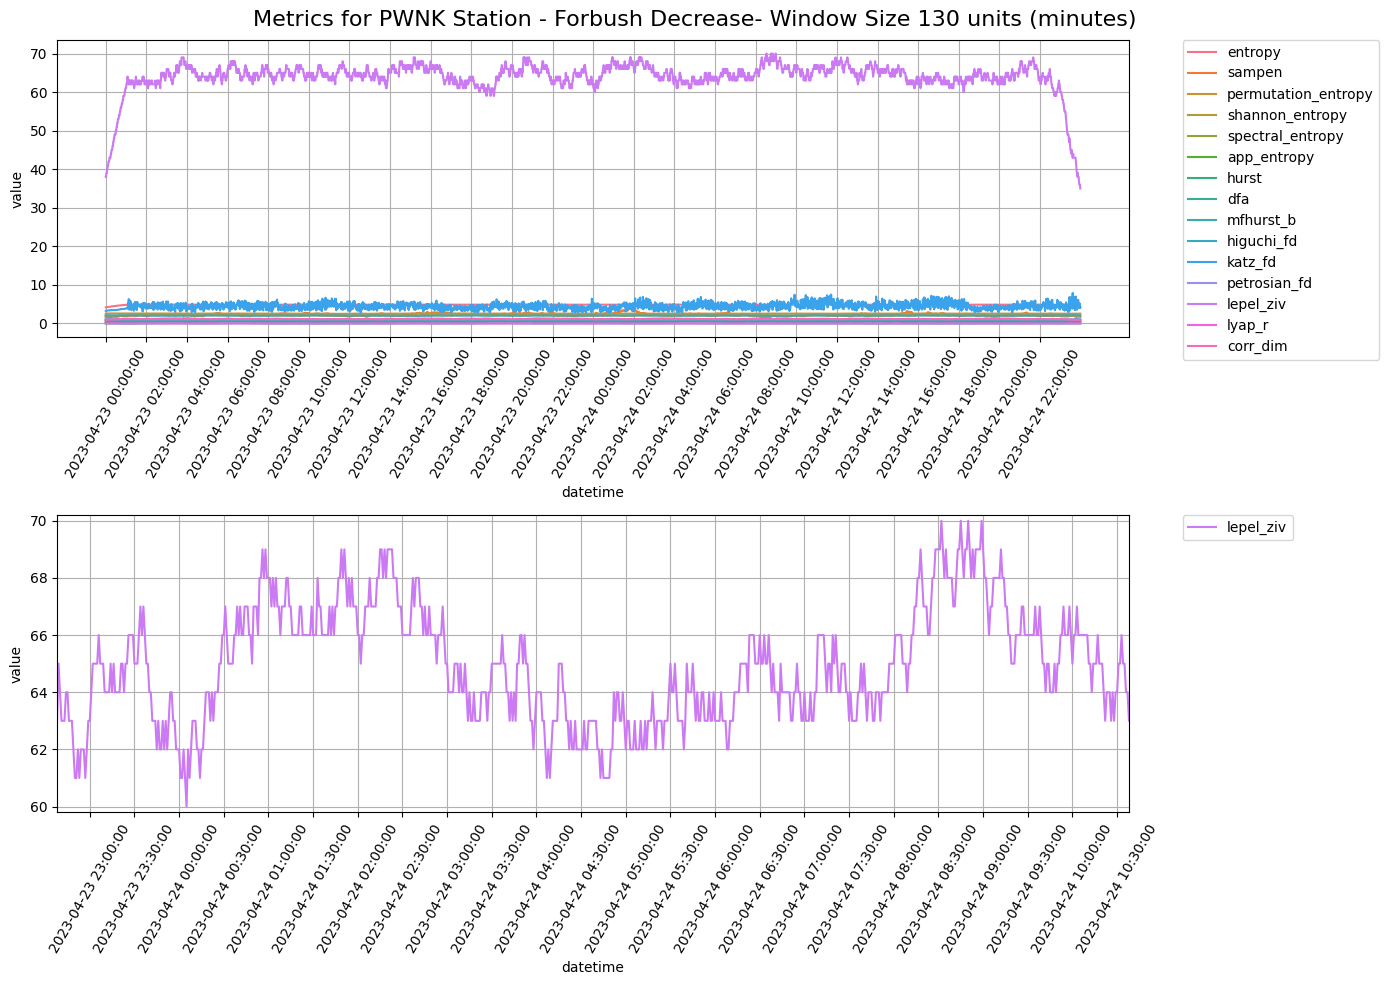

In [32]:
plot_metrics(
    event="Forbush Decrease",
    date=date,
    station=station,
    df=results,
    window_size=WINDOW_SIZE,
    relevant_metrics=["lepel_ziv"],
    min_datetime="2023-04-23 22:38:00",
    max_datetime="2023-04-24 10:38:00",
    suffix="2"
)
